#### 1. Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

#### 2. Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [3]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [5]:
data.shape

(9134, 24)

In [4]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
data.columns = [data.columns[col_name].lower().replace(' ','_') for col_name in range(len(data.columns))]
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

#### 12. What should we do with the customer id column?

In [11]:
data = data.set_index('customer')
data.head(10)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize


#### 8. Check nan values per column.

In [12]:
data.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

#### 2. Load the continuous and discrete variables into continuous_df and discrete_df variables.

#### 9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

#### 10. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

#### 11. Get categorical features.

In [19]:
categoricals = data.select_dtypes(include=['object'])
categoricals.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [14]:
for col in categoricals:
    print (categoricals[col].unique())

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2

In [20]:
numericals = data.select_dtypes(np.number).round(2)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.52,56274,69,32,5,0,1,384.81
QZ44356,6979.54,0,94,13,42,0,8,1131.46
AI49188,12887.43,48767,108,18,38,0,2,566.47
WW63253,7645.86,0,106,18,65,0,7,529.88
HB64268,2813.69,43836,73,12,44,0,1,138.13


In [21]:
dis_variables = []
con_variables = []

for col in numericals:
        print(col, "has", len(numericals[col].unique()), "unique values.")
        if len(numericals[col].unique()) < len(numericals)/2:
            dis_variables.append(col)
        else:
            con_variables.append(col)

customer_lifetime_value has 7996 unique values.
income has 5694 unique values.
monthly_premium_auto has 202 unique values.
months_since_last_claim has 36 unique values.
months_since_policy_inception has 100 unique values.
number_of_open_complaints has 6 unique values.
number_of_policies has 9 unique values.
total_claim_amount has 4946 unique values.


In [22]:
dis_variables

['monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies']

In [25]:
discrete = data[['monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
discrete

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
customer,,,,,
BU79786,69,32,5,0,1
QZ44356,94,13,42,0,8
AI49188,108,18,38,0,2
WW63253,106,18,65,0,7
HB64268,73,12,44,0,1
...,...,...,...,...,...
LA72316,73,18,89,0,2
PK87824,79,14,28,0,1
TD14365,85,9,37,3,2


In [26]:
con_variables

['customer_lifetime_value', 'income', 'total_claim_amount']

In [31]:
continuous = data[['customer_lifetime_value', 'income', 'total_claim_amount']].round(2)
continuous

,customer_lifetime_value,income,total_claim_amount
customer,,,
BU79786,2763.52,56274,384.81
QZ44356,6979.54,0,1131.46
AI49188,12887.43,48767,566.47
WW63253,7645.86,0,529.88
HB64268,2813.69,43836,138.13
...,...,...,...
LA72316,23405.99,71941,198.23
PK87824,3096.51,21604,379.20
TD14365,8163.89,0,790.78


#### 3. Plot a correlation matrix, what can you see? 

In [33]:
corr_mat = data.corr(method='spearman')
corr_mat

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.055395,0.453933,0.005126,-0.002429,-0.031312,0.488860,0.210598
income,0.055395,1.000000,-0.017608,-0.025784,-0.001945,0.006334,-0.010273,-0.401598
monthly_premium_auto,0.453933,-0.017608,1.000000,-0.005989,0.014596,-0.012751,-0.006936,0.522261
months_since_last_claim,0.005126,-0.025784,-0.005989,1.000000,-0.048269,0.005736,0.011439,-0.000782
months_since_policy_inception,-0.002429,-0.001945,0.014596,-0.048269,1.000000,-0.013233,-0.009546,-0.006569
number_of_open_complaints,-0.031312,0.006334,-0.012751,0.005736,-0.013233,1.000000,0.001523,-0.024694
number_of_policies,0.488860,-0.010273,-0.006936,0.011439,-0.009546,0.001523,1.000000,-0.011100
total_claim_amount,0.210598,-0.401598,0.522261,-0.000782,-0.006569,-0.024694,-0.011100,1.000000


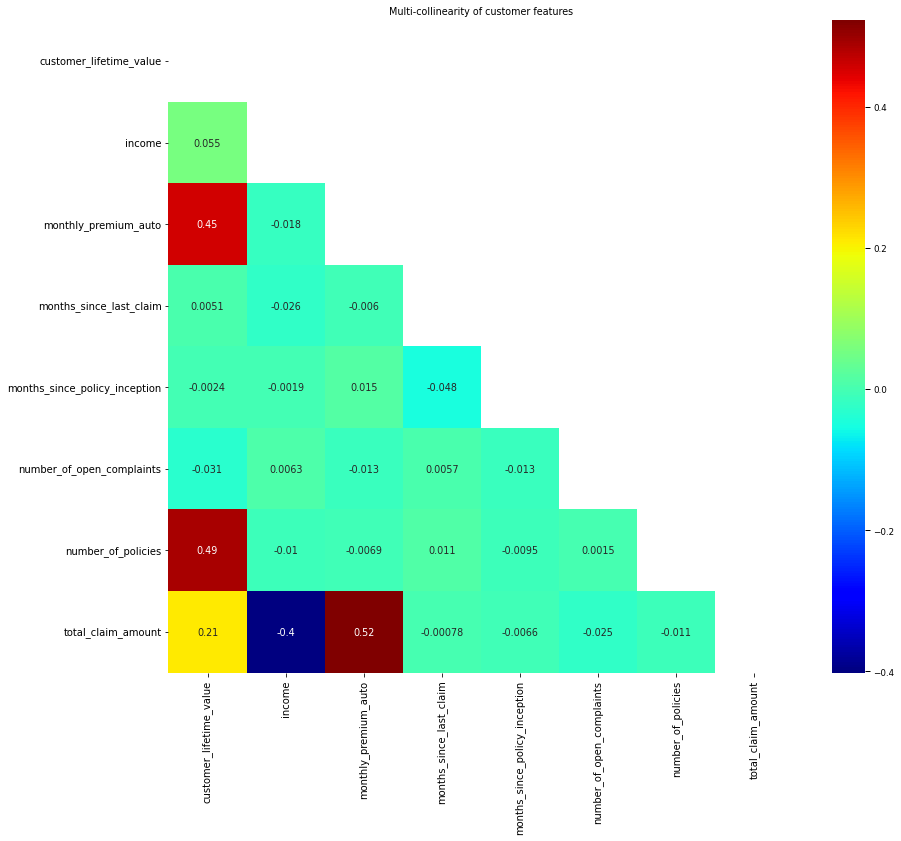

In [34]:
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True # Mask to hide the repeated half of the matrix

fig, ax = plt.subplots(figsize=(14, 12)) # this will set the width and height of the plot
sns.set_context('paper') #This affects things like the size of the labels, lines, and other elements of the plot
ax = sns.heatmap(corr_mat, mask=mask, annot=True, cmap='jet') # Heatmap declaration
ax.set_title('Multi-collinearity of customer features') #Title for the graph
plt.show()

#### 4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data). 

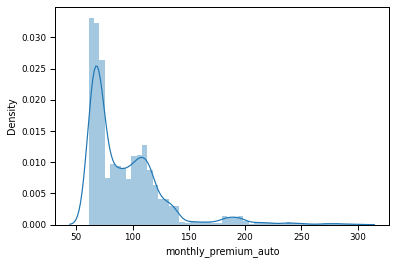

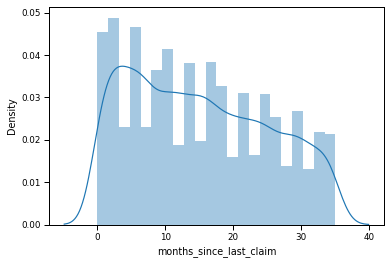

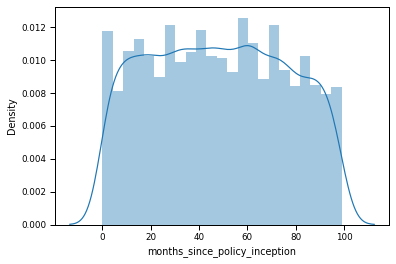

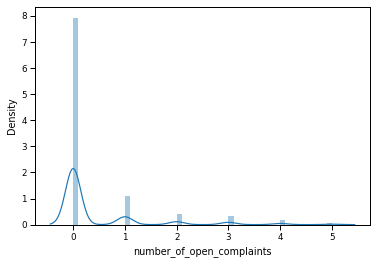

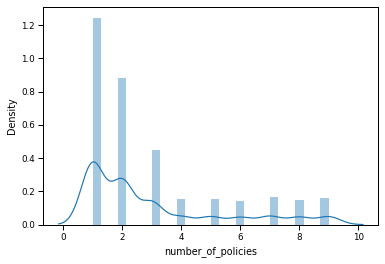

In [38]:
def plot_vars(data):
    for column in data.select_dtypes(np.number).columns:
        sns.distplot(data[column])
        plt.show()
        
        
plot_vars(discrete)

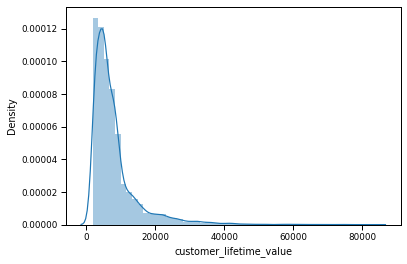

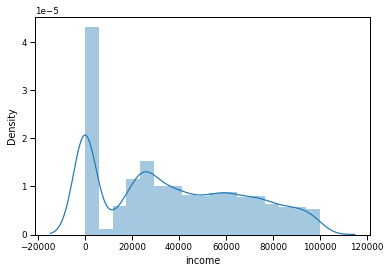

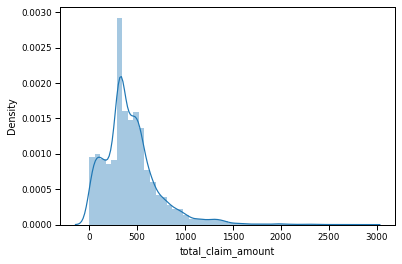

In [39]:
plot_vars(continuous)

#### 6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

#### 7. Have you found outliers? If you have, what should we do with them?

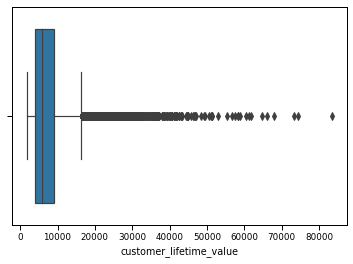

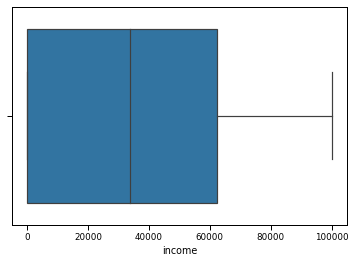

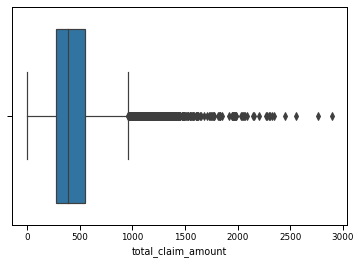

In [40]:
for column in continuous.columns:
        sns.boxplot(continuous[column])
        plt.show()

In [41]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(include='number').columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [43]:
continuous = remove_outliers(continuous, threshold=3, in_columns=continuous.columns)
continuous

,customer_lifetime_value,income,total_claim_amount
customer,,,
BU79786,2763.52,56274,384.81
QZ44356,6979.54,0,1131.46
AI49188,12887.43,48767,566.47
WW63253,7645.86,0,529.88
HB64268,2813.69,43836,138.13
...,...,...,...
YM19146,4100.40,47761,541.28
PK87824,3096.51,21604,379.20
TD14365,8163.89,0,790.78
